In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import io

# Homework 5 - Matplotlab tutorial

#### Excercise 1

Consider dropping two small rocks in a pond. They enter the water at the same time, at a certain distacne from each other. What is the interference pattern of waves on the surface of the pond? The wave height at point $(x,y)$ from where the first rock entered the water at point $(x_1,y_1)$ is 
$$f(r_1)=A\cos\left(kr_1\right)$$
where $k=2\pi/\lambda$ is the wavenumber related to the wavelength, and 
$$r_1=\sqrt{(x-x_1)^2+(y-y_1)^2}$$
The interference of the two waves is
$$I(r_1,r_2)=A\cos\left(kr_2\right)+A\cos\left(kr_2\right)$$
Let the wavelength be $\lambda=5$ cm, the amplitude be $A=1$ cm, and the rock's points of entry be 20 cm apart.

Write a program to make an image over 1 m<sup>2</sup> of the pond. To make the image create an array of values representing the height of the wave on a grid of points, then make a `pcolormesh` plot. Here is the outline of the code:
```python
# ALL UNITS IN (cm)
wavelength = 5.0
k = 2*numpy.pi/wavelength
seperation = 20.0
side_of_plot = 100.0
points = 500
spacing = side_of_plot/points

height = numpy.empty([points,points], float)
   
x1 = side/2 + seperation/2
y1 = side/2
x2 = side/2 - seperation/2
y2 = side/2
```

```c
# INCOMPLETE CODE PRESENTED HERE!
(i: loop over points along x side)
    y = spacing*i
    (j : loop over points along y side)
        x = spacing*j
        r1 = ?
        r2 = ?
        height[i,j] = ?
           
# NOW MAKE THE PLOT
```

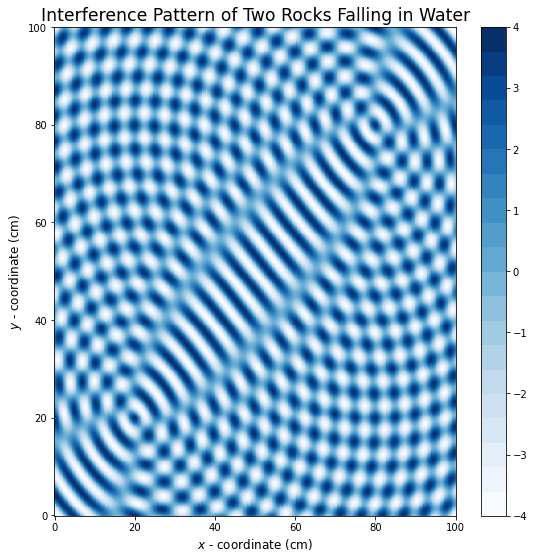

In [2]:
boxMin = 0.0
boxMax = 100.0
numPoints = 500

amplitude = 2.0
waveLength = 5.0
waveNumber = 2 * np.pi / waveLength

# Position of dropped rocks
(x1, y1) = (20, 20)
(x2, y2) = (80, 80)

x = np.linspace(boxMin, boxMax, numPoints)
y = np.linspace(boxMin, boxMax, numPoints)
# Creates a matrix of values, with standard matrix indexing (as opposed to cartesian indexing)
# Avoids unecessary for loops as suggested in template code
xx, yy = np.meshgrid(x, y, indexing="ij")

# Defines the wave pattern of a single drop at (x0, y0)
def wave(A: float, k: float, x0: float, y0: float, x: float, y: float) -> float:
    return A * np.cos(k * np.sqrt((x - x0)**2 + (y - y0)**2))

# Defines the interference pattern of a two drops, one at (x1, y1), and the other at (x2, y2)
def interference(A: float, k: float, x1: float, y1: float, x2: float, y2: float, x: float, y: float) -> float:
    return (
        wave(A, k, x1, y1, x, y) + wave(A, k, x2, y2, x, y)
    )

zz = interference(amplitude, waveNumber, x1, y1, x2, y2, xx, yy)

cmap = plt.get_cmap("Blues")
levels = mpl.ticker.MaxNLocator(nbins=20).tick_values(zz.min(), zz.max())
norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=True)

plt.figure(figsize=[9, 9])
plt.title("Interference Pattern of Two Rocks Falling in Water", size="xx-large")
plt.xlabel("$x$ - coordinate (cm)", size="large")
plt.ylabel("$y$ - coordinate (cm)", size="large")

plt.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
    ticks=np.linspace(zz.min(), zz.max(), 9)
)
plt.pcolormesh(xx, yy, zz, cmap=cmap, shading="auto")

plt.show()

#### Excercise 2

**Differtial Scanning Calorimtry (DSC)**

The data file `2018-11-22_INDIUM2.csv` was analysed using software that came with the DSC. However, I want to plot it seperately, outside that program, so I exported the data to file. 
* What's the encoding of this file? Use the `file` command on your system.
* How many columns of data are there, and what data are in each column? 
* How many lines of additional information are there before the actual data begins? 
* What type of file is `csv`?

Make a plot of the data, however this time, plot heat flow versus temperature. Use the data from index number 1200 to 2000 only.

Add an annotation arrow indicating the melting point of indium.

<div class="alert alert-block alert-info">
<b>Tip:</b> Note that in this case, you will need to use the <tt>delimiter</tt> option of <tt>numpy.loadtxt</tt> to read around the commas.
</div>

In [3]:
# This works on UNIX and MAC
# Note: I have Windows Subsystem for Linux Enabled (with Ubuntu installed, so I can execute this on my Windows PC)

In [4]:
%%bash
file "2018-11-22_INDIUM2.csv"

2018-11-22_INDIUM2.csv: ASCII text, with CRLF line terminators


In [5]:
data = np.genfromtxt("2018-11-22_INDIUM2.csv", delimiter=",", dtype=float, skip_header=62)
print(f"{data.shape = }")

temp = data[1200:2000, 0]
heat = data[1200:2000, 1]

minTemp = temp[np.argmin(heat)]
minHeat = heat[np.argmin(heat)]

print(f"{minTemp = }, {minHeat = }")

data.shape = (4697, 2)
minTemp = 156.08, minHeat = -2.04


**Answer:**


### Encoding
The encoding of the file is ASCII text

### Size of data file
See above code

### Lines of additional data
Lines 1 - 62 contain the header information, therefore there are 62 lines of data we must ignore before importing the data

### What is .CSV file?
A CSV file is simply 'comma seperated values', which is like a plain text format of a spreadsheet

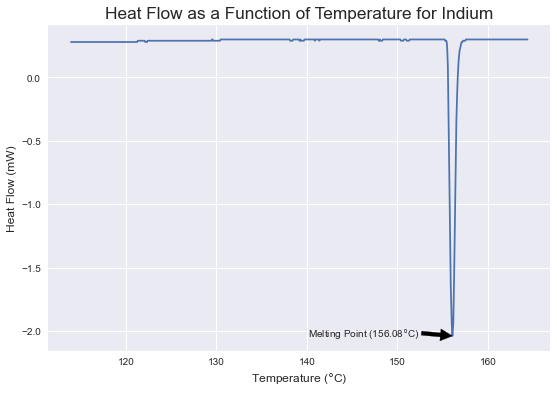

In [6]:
# Plotting the Data
plt.style.use("seaborn")

plt.figure(figsize=[9, 6])

plt.title("Heat Flow as a Function of Temperature for Indium", size="xx-large")
plt.xlabel("Temperature ($\degree$C)", size="large")
plt.ylabel("Heat Flow (mW)", size="large")

plt.annotate(
    f"Melting Point ({minTemp}$\degree$C)", 
    xy=(minTemp, minHeat), 
    xytext=(minTemp - 16, minHeat), 
    arrowprops=dict(facecolor='black', shrink=1)
)
plt.plot(temp, heat)

plt.show()

#### Excercise 3

The next set of data are from the KSV/Nima Langmuir trough in H208, and are compression isotherms of a [single-molecule thick layer][monolayer] of lipid molecules on the surface of water. 

`09-11-2018_DPPC.txt`

**A.** Show the isotherm by plotting surface pressure ($\pi$ or variable P1) versus mean molecular area (surface area divided by the number of molecules, $A/N$ or variable Mma). In other words, make a plot of the ideal gas law for 2D ($\pi A=Nk_BT$) for constant $T$. 

You will note that over time the surface pressure settles to a value around 45 mN/m for DPPC. So only plot data up to time point of ~1400 seconds.

The *bulk compressibility* of a monolayer film is given by the inverse of the slope of the graph.

$$C = -\frac{1}{A}\left(\frac{\mathrm{d} A}{\mathrm{d}\pi}\right)_T$$

The lowest slope of the graph (at large mean molecular area) is a 2D **gas phase**. The hump in the data is a trasition to a 2D **liquid phase**. Finally, the stepest slope is an uncompressible a **solid phase**.

**B.** Annotate the phases seen in the graph.
    
[monolayer]: https://en.wikipedia.org/wiki/Monolayer


In [7]:
%%bash
file "09-11-2018_DPPC.txt"

09-11-2018_DPPC.txt: UTF-8 Unicode text, with CRLF line terminators


data.shape = (934, 10)


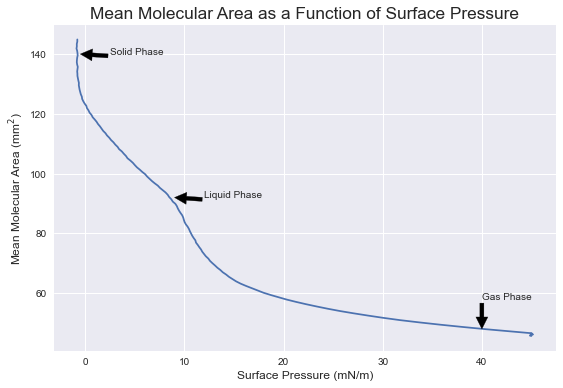

In [8]:
data = np.loadtxt("09-11-2018_DPPC.txt", dtype=float, skiprows=1)
print(f"{data.shape = }")

pressure = data[data[:,0] < 1400,5]
meanMolecularArea = data[data[:,0] < 1400,4]

fig, ax = plt.subplots(figsize=[9, 6])
# ax.set_yscale("log")

plt.title("Mean Molecular Area as a Function of Surface Pressure", size="xx-large")
plt.xlabel("Surface Pressure (mN/m)", size="large")
plt.ylabel("Mean Molecular Area (mm$^2$)", size="large")

plt.annotate(
    "Gas Phase", 
    xy=(40, 48), 
    xytext=(40, 48 + 10), 
    arrowprops=dict(facecolor='black', shrink=1)
)
plt.annotate(
    "Liquid Phase", 
    xy=(9, 92), 
    xytext=(9 + 3, 92), 
    arrowprops=dict(facecolor='black', shrink=1)
)
plt.annotate(
    "Solid Phase", 
    xy=(-0.5, 140), 
    xytext=(-0.5 + 3, 140), 
    arrowprops=dict(facecolor='black', shrink=1)
)

plt.plot(pressure, meanMolecularArea)

plt.show()

#### Excercise 4

The next is raw data from the Rigaku X-ray machine in H305. It is reflection of X-rays from a single layer thick film of octadecyl silane grafted to a single silicon crystal.     

`05-03-2017_OTS_REFLECT.ras`

* Follow the example from the lecture notes are plot the data set in its full scan range of $2\theta$. Use a log scale on the y-axis.
* Annotate the peak at low angle to indicate where there was total X-ray reflection from the surface. The corner of the curve is called the critical angle.
* Annotate the two minimum showing destructive wave interference. The distance between these minimum indicates the thickness of the film.

<div class="alert alert-block alert-info">
    <b>Tip:</b> This is not a normal powder diffraction scan; it is a reflectivity curve. You will see there are different three scan ranges where the counting time was changed, so they do not line up. The intensity is recorded as counts per second, so you need to multiply the intensity times the counting time to properly connect the different regions.
</div>

In [9]:
%%bash
file "05-03-2017_OTS_REFLECT.ras"

05-03-2017_OTS_REFLECT.ras: ASCII text, with CRLF line terminators


data.shape = (1001, 3)


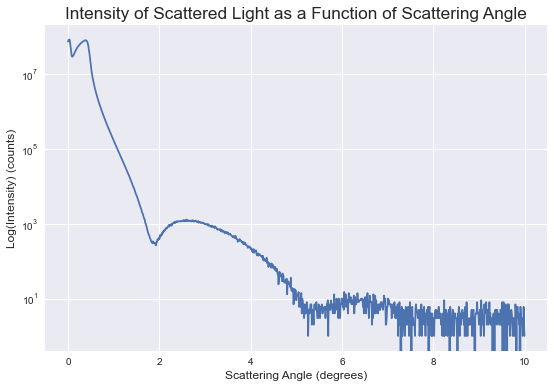

In [10]:
# Context manager to automatically close file after reading
with open("05-03-2017_OTS_REFLECT.ras", "r", encoding="ISO-8859-1") as f:
    dataString = f.read()
    dataIO = io.StringIO(dataString)
    data = np.loadtxt(dataIO, comments="*", dtype=float)

print(f"{data.shape = }")

angle = data[:, 0]
counts = data[:, 1]
normalization = data[:, 2]
normCounts = counts * normalization


fig, ax = plt.subplots(figsize=[9, 6])
ax.set_yscale("log")

plt.plot(angle, normCounts)

plt.title("Intensity of Scattered Light as a Function of Scattering Angle", size="xx-large")
plt.xlabel("Scattering Angle (degrees)", size="large")
plt.ylabel("Log(Intensity) (counts)", size="large")

plt.annotate(
    "Destructive Wave Interference", 
    xy=(
        angle[np.argmin(normCounts[(0 < angle) & (angle < 0.1)])], 
        normCounts[np.argmin(normCounts[(0 < angle) & (angle < 0.1)])]
    ), 
    xytext=(0, 1E6), 
    arrowprops=dict(facecolor='black', shrink=1)
)
plt.annotate(
    "Destructive Wave Interference", 
    xy=(
        angle[np.argmin(normCounts[(2 < angle) & (angle < 4)])], 
        normCounts[np.argmin(normCounts[(2 < angle) & (angle < 4)])]
    ), 
    xytext=(1.2, 10),
    arrowprops=dict(facecolor='black', shrink=1)
)
plt.annotate(
    "Total X-ray Reflection", 
    xy=(
        angle[np.argmax(normCounts[(0.1 < angle) & (angle < 0.4)])], 
        normCounts[np.argmax(normCounts[(0.1 < angle) & (angle < 0.4)])]
    ), 
    xytext=(1.5, 5E7),
    arrowprops=dict(facecolor='black', shrink=1)
)

plt.show()
